## Practice 3. 국가 군집화

데이터 셋: https://www.kaggle.com/datasets/ashydv/country-socioeconomic-data  
참고 자료: https://www.kaggle.com/code/ashydv/country-clustering-hierarchical-clustering-pca

각 국가별 사회적, 경제적 지표들이 들어있는 데이터 셋이 주어집니다.

- country: 국가 이름
- child_mort: 1000명당 5세 미만 아동 사망률
- exports: 상품 및 서비스 수출. 총 GDP 대비 백분율로 표시됨
- health: 총 건강 지출. 총 GDP 대비 백분율로 표시됨
- imports: 상품 및 서비스 수입. 총 GDP 대비 백분율로 표시됨
- Income: 개인 당 순소득
- Inflation: 총 GDP의 연간 성장률 측정
- life_expec: 현재 사망률 패턴이 지속된다고 할 때, 신생아의 평균 수명
- total_fer: 현재의 연령별 출산율이 유지된다고 할 때, 각 여성당 출산될 아이의 수
- gdpp: 1인당 GDP. 총 GDP를 총 인구로 나눈 값
- region_1: 지역 구분 1
- region_2: 지역 구분 2
- continent: 대륙

이 데이터를 활용하여 국가들을 군집화 하고 싶습니다. 계층적 군집 분석을 다양하게 활용해보세요. 대륙은 다르지만 같은 군집으로 분류되는 국가들은 어떤 특징을 가지고 있는지 분석해보세요. 

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import pandas as pd

df = pd.read_csv("./data/country.csv", index_col="country")
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region_1,region_2,continent
country,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Southern Asia,NaN,Asia
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Southern Europe,NaN,Europe
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Northern Africa,NaN,Africa
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Middle Africa,Sub-Saharan Africa,Africa
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Caribbean,Latin America and the Caribbean,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Melanesia,NaN,Oceania
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,South America,Latin America and the Caribbean,South America
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,South-eastern Asia,NaN,Asia


economic related : exports,imports,income,inflation,gdpp

health related : child_mort,health,life_expec,total_fer

목표 1 : 경제적 요인과 건강적 요인의 관계를 밝힌다

목표 2 : 지역적 요인과 건강적 요인의 관계를 밝힌다

목표 3 : 지역적 요인과 경제적 요인의 관게를 밝힌다

========================

최종목표 : 지리적 요인과 경제적 요인의 관계를 밝힌다

In [ ]:
print(df.index.values)

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

<Axes: xlabel='gdpp', ylabel='Count'>

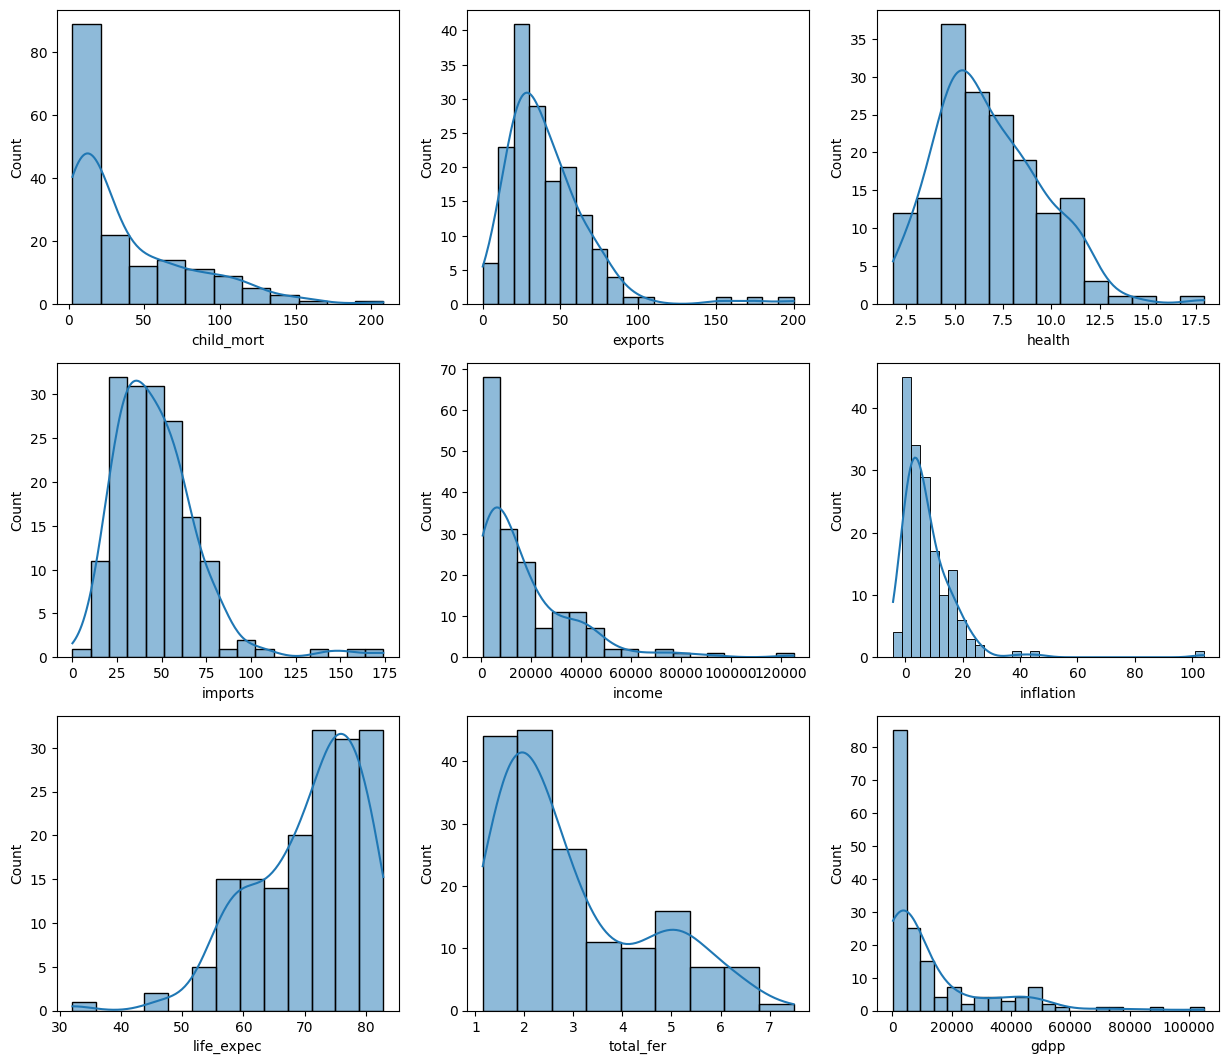

In [3]:
plt.figure(figsize=(15,13))

plt.subplot(3,3,1)
sns.histplot(data = df, x = 'child_mort',kde=True)

plt.subplot(3,3,2)
sns.histplot(data = df, x = 'exports',kde=True)

plt.subplot(3,3,3)
sns.histplot(data = df, x = 'health',kde=True)

plt.subplot(3,3,4)
sns.histplot(data = df, x = 'imports',kde=True)

plt.subplot(3,3,5)
sns.histplot(data = df, x = 'income',kde=True)

plt.subplot(3,3,6)
sns.histplot(data = df, x = 'inflation',kde=True)

plt.subplot(3,3,7)
sns.histplot(data = df, x = 'life_expec',kde=True)

plt.subplot(3,3,8)
sns.histplot(data = df, x = 'total_fer',kde=True)

plt.subplot(3,3,9)
sns.histplot(data = df, x = 'gdpp',kde=True)


In [ ]:
plt.figure(figsize=(15,13))

plt.subplot(3,3,1)
sns.boxplot(data = df, x = 'child_mort')

plt.subplot(3,3,2)
sns.boxplot(data = df, x = 'exports')

plt.subplot(3,3,3)
sns.boxplot(data = df, x = 'health')

plt.subplot(3,3,4)
sns.boxplot(data = df, x = 'imports')

plt.subplot(3,3,5)
sns.boxplot(data = df, x = 'income')

plt.subplot(3,3,6)
sns.boxplot(data = df, x = 'inflation')

plt.subplot(3,3,7)
sns.boxplot(data = df, x = 'life_expec')

plt.subplot(3,3,8)
sns.boxplot(data = df, x = 'total_fer')

plt.subplot(3,3,9)
sns.boxplot(data = df, x = 'gdpp')


In [24]:
df['region_1'].unique()

array(['Southern Asia', 'Southern Europe', 'Northern Africa',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Southern Africa',
       'South-eastern Asia', 'Eastern Africa', 'Northern America',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Central Asia',
       'Micronesia', 'Polynesia'], dtype=object)

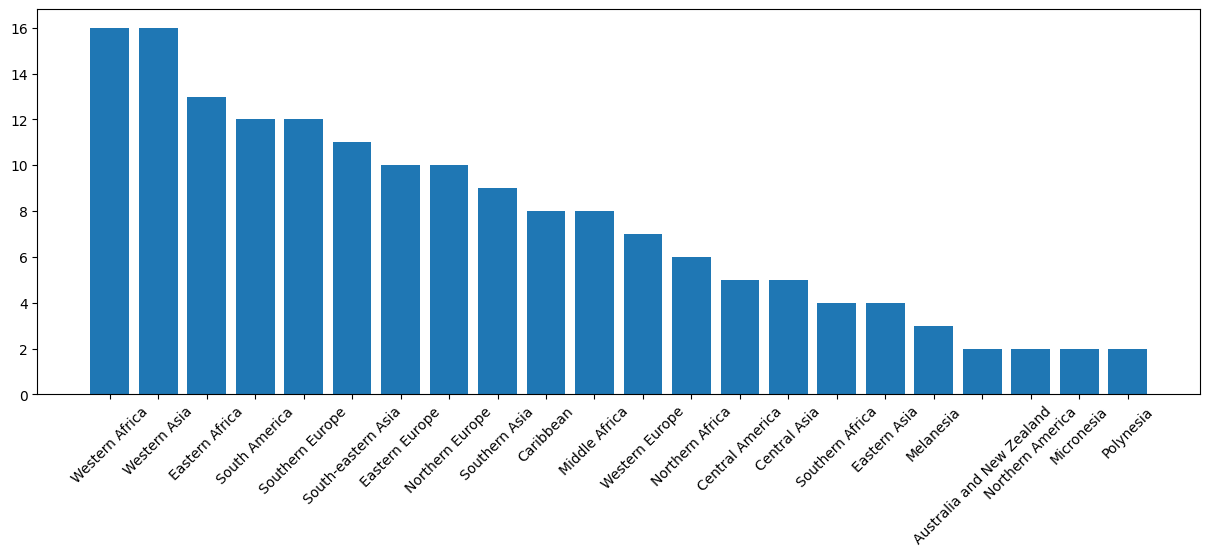

In [43]:
region_counts = (df['region_1'].value_counts())

plt.figure(figsize=(15,5))
plt.bar(region_counts.index,region_counts)
_=plt.xticks(rotation=45)

In [66]:
df['region_1'].value_counts()

region_1
Western Africa               16
Western Asia                 16
Eastern Africa               13
South America                12
Southern Europe              12
South-eastern Asia           11
Eastern Europe               10
Northern Europe              10
Southern Asia                 9
Caribbean                     8
Middle Africa                 8
Western Europe                7
Northern Africa               6
Central America               5
Central Asia                  5
Southern Africa               4
Eastern Asia                  4
Melanesia                     3
Australia and New Zealand     2
Northern America              2
Micronesia                    2
Polynesia                     2
Name: count, dtype: int64

In [52]:
from scipy.cluster import hierarchy as hc

geo_eco_df = df[['region_1','exports','imports','income','inflation','gdpp']]

In [67]:
regions = ['Southern Asia', 'Southern Europe', 'Northern Africa',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Southern Africa',
       'South-eastern Asia', 'Eastern Africa', 'Northern America',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Central Asia',
       'Micronesia', 'Polynesia']

for i in range(len(regions)):
    geo_eco_df = geo_eco_df.replace({'region_1':regions[i]},i)

In [ ]:
sns.pairplot(geo_eco_df,hue='region_1')

In [68]:
geo_eco_df

,region_1,exports,imports,income,inflation,gdpp
country,,,,,,
Afghanistan,0,10.0,44.9,1610,9.44,553
Albania,1,28.0,48.6,9930,4.49,4090
Algeria,2,38.4,31.4,12900,16.10,4460
Angola,3,62.3,42.9,5900,22.40,3530
Antigua and Barbuda,4,45.5,58.9,19100,1.44,12200
...,...,...,...,...,...,...
Vanuatu,18,46.6,52.7,2950,2.62,2970
Venezuela,5,28.5,17.6,16500,45.90,13500
Vietnam,13,72.0,80.2,4490,12.10,1310


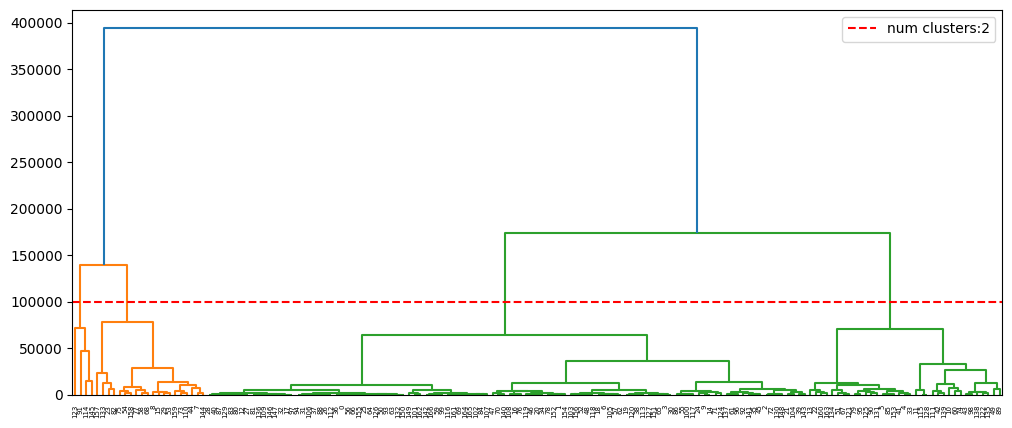

In [70]:
plt.figure(figsize=(12,5))
_=hc.dendrogram(hc.linkage(geo_eco_df,method='ward'))
plt.axhline(100000,color='red',linestyle='--',label='num clusters:2')
plt.legend()

In [71]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from tqdm.notebook import tqdm


silhouette_scores = []
for i in tqdm(range(2,11)):
    silhouette_scores.append(
        silhouette_score(geo_eco_df,AgglomerativeClustering(n_clusters = i).fit_predict(geo_eco_df))
    )

  0%|          | 0/9 [00:00<?, ?it/s]

In [72]:
silhouette_scores

[0.7228268924095648,
 0.5963310683463067,
 0.6085690603546833,
 0.6131015082430074,
 0.6151398777669155,
 0.5387772707444893,
 0.5063418280801288,
 0.5083992216120933,
 0.5376228512711599]

<BarContainer object of 9 artists>

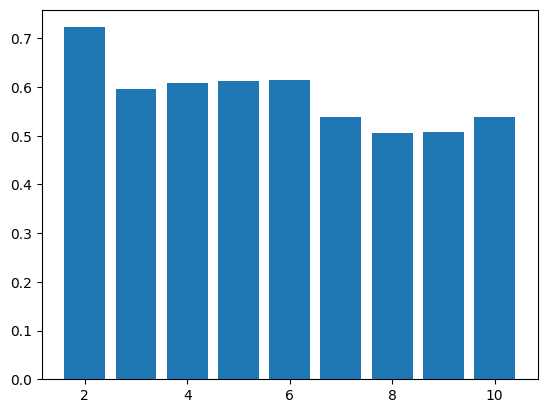

In [73]:
plt.bar(range(2,11),silhouette_scores)

In [77]:
silhouette_score(geo_eco_df,AgglomerativeClustering(n_clusters=2).fit_predict(geo_eco_df))

0.7228268924095648

In [78]:
model = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
geo_eco_df['label'] = model.fit_predict(geo_eco_df)

c:\Users\xzv22\.conda\envs\mulcam_3_9\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [85]:
geo_eco_df.groupby(['label'])['income'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,143.0,11085.055944,10020.796687,609.0,2740.0,8000.0,16250.0,45400.0
1,24.0,53250.000000,21766.228329,35800.0,40250.0,43600.0,58775.0,125000.0


In [86]:
geo_eco_df

,region_1,exports,imports,income,inflation,gdpp,label
country,,,,,,,
Afghanistan,0,10.0,44.9,1610,9.44,553,0
Albania,1,28.0,48.6,9930,4.49,4090,0
Algeria,2,38.4,31.4,12900,16.10,4460,0
Angola,3,62.3,42.9,5900,22.40,3530,0
Antigua and Barbuda,4,45.5,58.9,19100,1.44,12200,0
...,...,...,...,...,...,...,...
Vanuatu,18,46.6,52.7,2950,2.62,2970,0
Venezuela,5,28.5,17.6,16500,45.90,13500,0
Vietnam,13,72.0,80.2,4490,12.10,1310,0


<Axes: xlabel='label', ylabel='exports'>

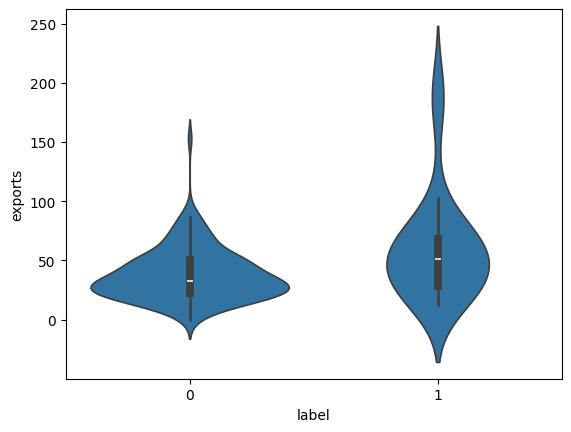

In [87]:
sns.violinplot(
    data = geo_eco_df,
    x = 'label',
    y = 'exports'
)

<Axes: xlabel='label', ylabel='income'>

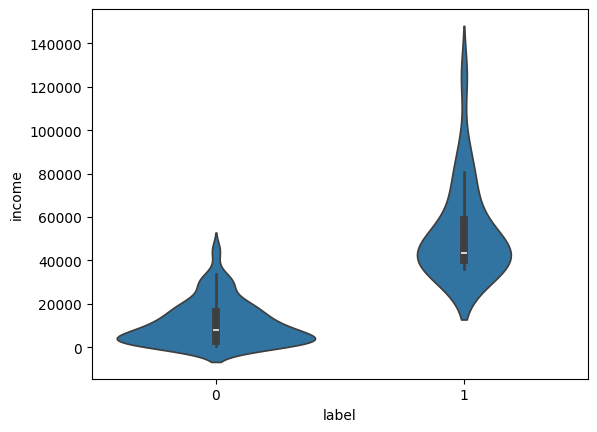

In [88]:
sns.violinplot(
    data = geo_eco_df,
    x = 'label',
    y = 'income'
)